### **Gradient Boosting** 

The **principle** behind boosting algorithms is that **first we build a model on the training dataset, then a second model is built to rectify the errors present in the first model.** 

This procedure is continued until and unless the **errors are minimized**, and the dataset is predicted correctly. 

In particular, we start with a weak model and subsequently, each new model is fit on a modified version of the original dataset.

**Notes :**
* A weak learner is a model that performs at least slightly better than a random model.

* Decision trees are generally used as weak learners in gradient boost.

* Unlike AdaBoost where decision trees with only one level (decision stumps) are used, decision trees in Gradient Boost generally consists of some 3-7 levels.

#### **Objective**

In this notebook, we implement Gradient Boosting algorithm and show it works for regression.

#### **Steps :**

Following are the steps involved :

1. Make a first guess for y_train and y_test, using the average of y_train.

\begin{align}
y_{train_{p0}} = \frac{1}{n}\sum_{i=1}^n y_{train_t}
\end{align}

\begin{align}
y_{test_{p0}} = y_{train_{p0}}
\end{align}

2. Calculate the residuals from the training dataset. 

\begin{align}
r_0 = y_{train} - y_{train_{p0}}
\end{align}

3. Fit a weak learner to the residuals minimizing the loss function. Let's call it *f0*.

\begin{align}
r_0 = f_0(X_{train})
\end{align}

4. Increment the predicted y's. 

\begin{align}
y_{train_{p1}} = y_{train_{p0}} + \alpha f_0(X_{train})
\end{align}

\begin{align}
y_{test_{p1}} = y_{test_{p0}} + \alpha f_0(X_{test})
\end{align}

where, α is the learning rate.

5. Repeat steps 2 through 4 until you reach the number of boosting rounds.

#### **Importing Libraries**

In [1]:
import numpy as np
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#### **Gradient Boost Class**

We will need to run several iterations, so let's create a function to implement GradBoost.

In [2]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):
    # make a first guess of our training target variable using the mean of y_train
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))

    # initialize the test predictions with the mean of the training target variable.
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))

    # calculate the residuals from the training data using the first guess
    residuals = y_train - y_hat_train

    # iterates through the boosting round.
    for i in range(0, boosting_rounds):
        # fit the model to the residuals
        model = model.fit(X_train, residuals)

        # increment the predicted training y with the pseudo residual * learning rate
        y_hat_train = y_hat_train + learning_rate*model.predict(X_train)

        # increment the predicted test y as well
        y_hat_test = y_hat_test + learning_rate * model.predict(X_test)

        # calculate the residuals for the next round
        residuals = y_train - y_hat_train

    return y_hat_train, y_hat_test

#### **Demonstration**

We will create a synthetic dataset on which we will apply Gradient Boost.

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_targets=1,
    bias=0.0,
    noise=20,
    shuffle=True,
    random_state=13)

X_train, X_test, y_train, y_test= X[0:800], X[800:], y[0:800], y[800:]

In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 20), (200, 20), (800,), (200,))

The weak learner that we will use in `DecisionTreeRegressor` with a depth of 3. 

We can also use other regressors such as linear regression, ridge regression etc.

In [5]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

Let's see how the squared error reduces as we keep increasing the number of boosting rounds.

We will store the errors in a list and will plot them further.

In [6]:
mse_train = []
n_rounds = np.arange(5, 101, 5)

for n_round in n_rounds:
    y_hat_train = GradBoost(model,
                            X_train,
                            y_train,
                            X_test,
                            boosting_rounds=n_round,
                            learning_rate=0.1)[0]  

    mse_train.append(np.mean((y_train-y_hat_train)**2))

Let's plot the reduction in training error wrt the number of boosting rounds. (we can similarly plot for test_error)

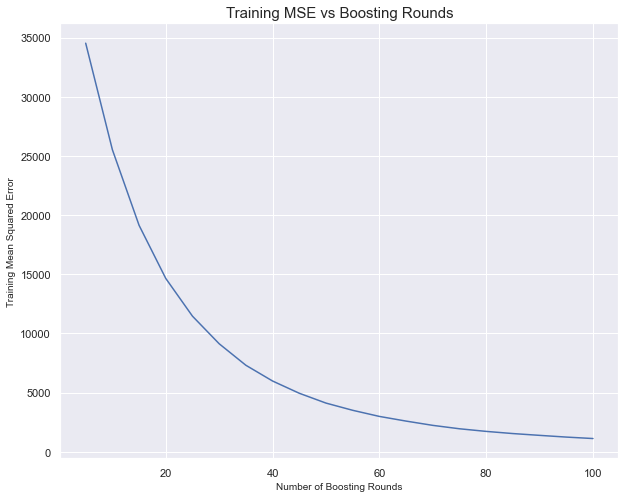

In [7]:
plt.rcParams['figure.figsize'] = (10,8) 
plt.plot(n_rounds, mse_train) 
plt.title('Training MSE vs Boosting Rounds', fontsize=15) 
plt.xlabel('Number of Boosting Rounds', fontsize=10) 
plt.ylabel('Training Mean Squared Error',fontsize=10) 
plt.show()

Performing the same steps for testing data.

In [8]:
mse_test = []
n_rounds = np.arange(5, 101, 5)

for n_round in n_rounds:
    y_hat_test = GradBoost(model,
                            X_train,
                            y_train,
                            X_test,
                            boosting_rounds=n_round,
                            learning_rate=0.1)[1]

    mse_test.append(np.mean((y_test - y_hat_test)**2))

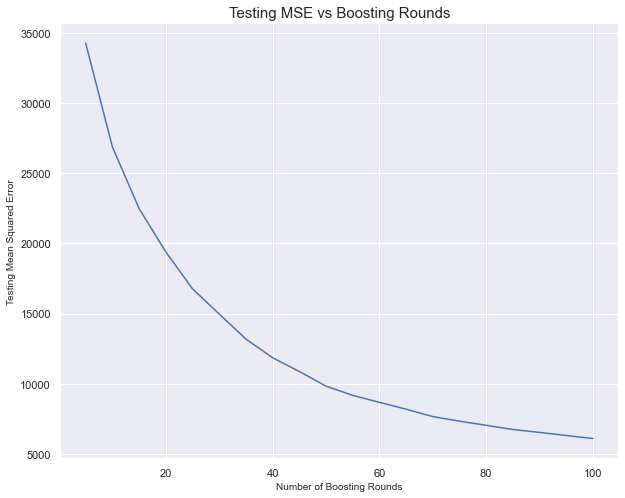

In [9]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.plot(n_rounds, mse_test)
plt.title('Testing MSE vs Boosting Rounds', fontsize=15)
plt.xlabel('Number of Boosting Rounds', fontsize=10)
plt.ylabel('Testing Mean Squared Error', fontsize=10)
plt.show()

We can also compare the actual target values with the predicted values for a given boosting_rounds value. 

Initially, we consider the mean of y_train values as the prediction. 

Let's plot that.

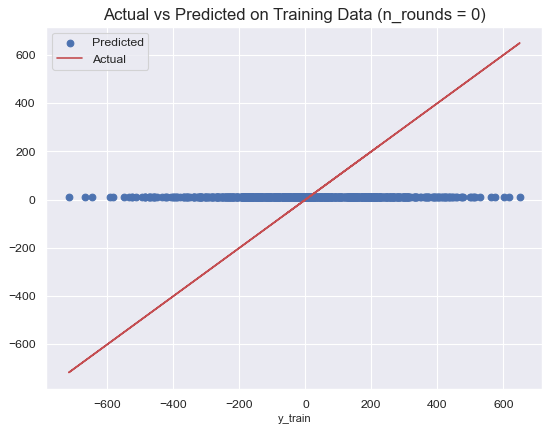

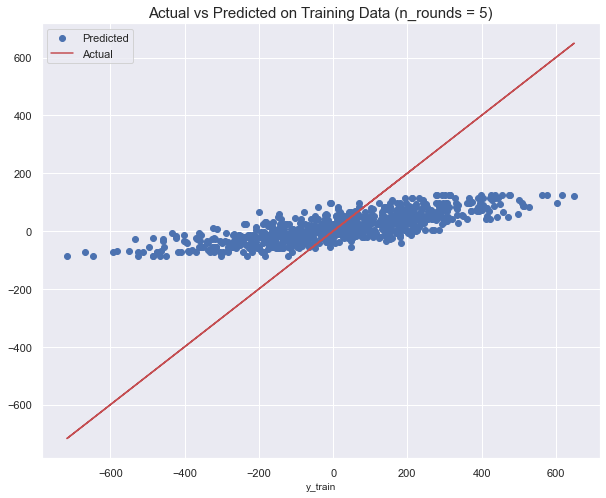

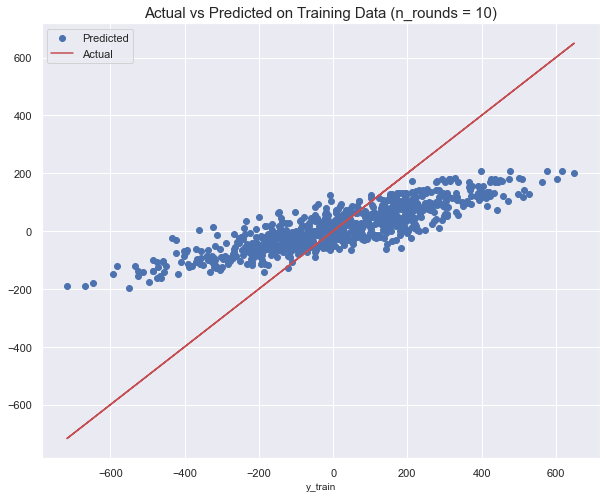

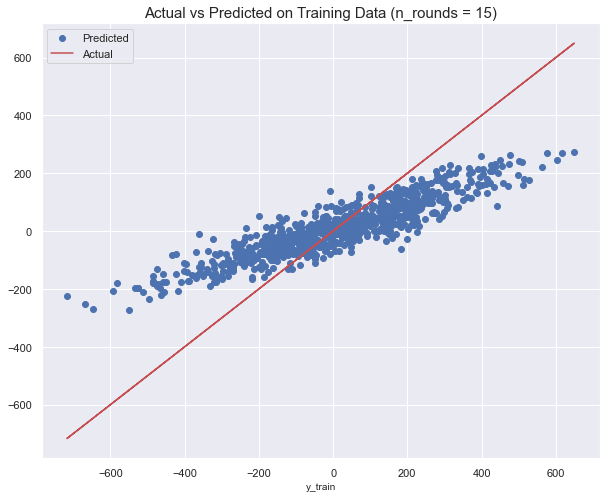

In [10]:
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

n_rounds = 0

for x in range(0,16,5):
    y_hat_train, y_hat_test = GradBoost(model,
                                        X_train,
                                        y_train,
                                        X_test,
                                        boosting_rounds=x,
                                        learning_rate=0.1)

    plt.scatter(y_train, y_hat_train, label='Predicted')
    plt.title('Actual vs Predicted on Training Data (n_rounds = '+str(x) +
            ')', fontsize=15)

    plt.xlabel('y_train', fontsize=10)
    plt.plot(y_train, y_train, color='r', label='Actual')
    plt.legend()
    plt.show()


Now for boosting rounds = 300 : 

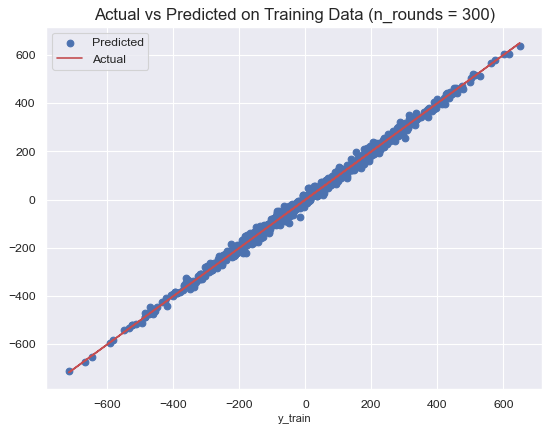

In [11]:
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
n_rounds = 300

y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)

plt.scatter(y_train, y_hat_train, label='Predicted')
plt.title('Actual vs Predicted on Training Data (n_rounds = '+str(n_rounds) +
        ')', fontsize=15)

plt.xlabel('y_train', fontsize=10)
plt.plot(y_train, y_train, color='r', label='Actual')
plt.legend()
plt.show()
